In [ ]:
#Solo correr en Deepnote
import os
path = r'/work/online_retail_analysis'
os.chdir(path)
!pip install --editable .
!pip install pyprojroot
# !pip install openpyxl

In [62]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import online_retail_analysis.utils.paths as path
from online_retail_analysis.visualization.visualize import show_values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set( rc = {'figure.figsize' : ( 17, 8 ),'axes.labelsize' : 12 })

# sns.set_theme(style="white")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [64]:
df_cluster = pd.read_csv(path.data_processed_dir('data_clustering.csv'))
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     4338 non-null   float64
 1   Recency        4338 non-null   int64  
 2   MonetaryValue  4338 non-null   float64
 3   Frequency      4338 non-null   int64  
 4   Variety        4338 non-null   int64  
 5   Total_Score    4338 non-null   int64  
 6   Cluster        4338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 237.4 KB


In [65]:
df_cluster['Cluster'] = df_cluster['Cluster'].astype('category')
# df_cluster['Total_Score'] = df_cluster['Total_Score'].astype('category')
df_cluster.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     4338 non-null   float64 
 1   Recency        4338 non-null   int64   
 2   MonetaryValue  4338 non-null   float64 
 3   Frequency      4338 non-null   int64   
 4   Variety        4338 non-null   int64   
 5   Total_Score    4338 non-null   int64   
 6   Cluster        4338 non-null   category
dtypes: category(1), float64(2), int64(4)
memory usage: 207.9 KB


In [66]:
# rfm_values(df_cluster).reset_index()

df_cluster.groupby(['Cluster'])[['Total_Score']].quantile(q=[0.166,0.332, 0.498, 0.664, 0.83,1]).T

# df_cluster[['Total_Score','Cluster']]

Cluster         0                                    1                       \
            0.166 0.332 0.498 0.664 0.830 1.000  0.166  0.332  0.498  0.664   
Total_Score 7.000 7.000 7.000 8.000 8.000 8.000 11.000 11.000 12.000 12.000   

Cluster      ...     4                       5                            \
             ... 0.498 0.664 0.830 1.000 0.166 0.332 0.498  0.664  0.830   
Total_Score  ... 4.000 4.000 4.000 4.000 9.000 9.000 9.000 10.000 10.000   

Cluster             
             1.000  
Total_Score 10.000  

[1 rows x 36 columns]

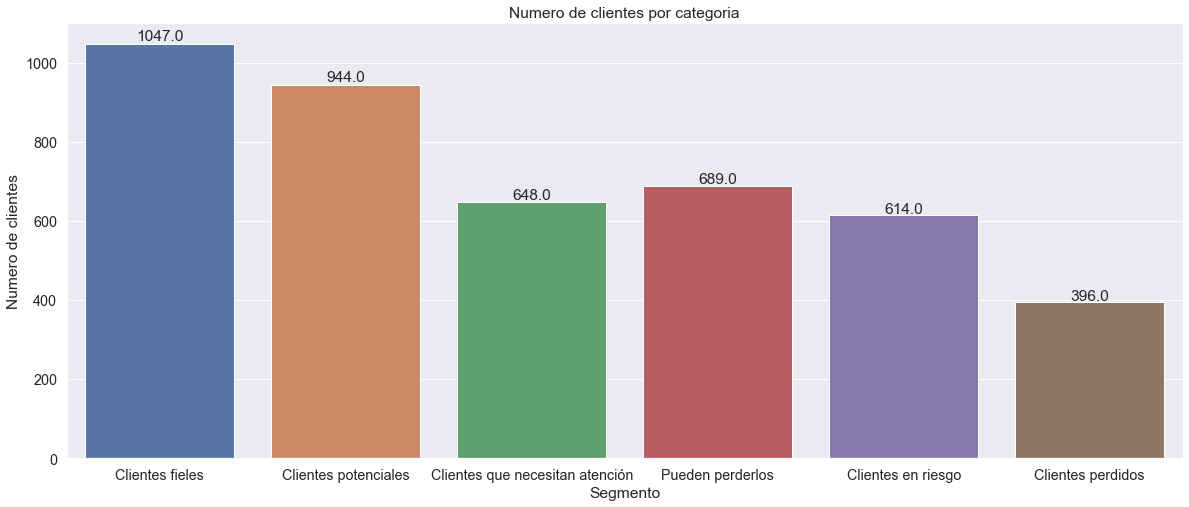

In [67]:
# clus_3 = 'Loyal Customers' , clus_1 = 'Potential Costumers', clus_5 = 'Customers Needing Attention', clus_0 = 'Can lose them', clus_2 = 'At risk customers', clus_4 = 'Lost Customers'

df_cluster['Class_Cluster'] = df_cluster['Cluster'].cat.rename_categories(['Pueden perderlos','Clientes potenciales','Clientes en riesgo', 'Clientes fieles','Clientes perdidos','Clientes que necesitan atención'])

# 'Clientes fieles','Clientes potenciales','Clientes que necesitan atención','Pueden perderlos','Clientes en riesgo','Clientes perdidos' - 'Loyal Customers','Potential Costumers','Customers Needing Attention','Can lose them','At risk customers','Lost Customers'
df_cluster['Class_Cluster'] = df_cluster['Class_Cluster'].cat.set_categories(['Clientes fieles','Clientes potenciales','Clientes que necesitan atención','Pueden perderlos','Clientes en riesgo','Clientes perdidos'])

df_cluster[['Cluster','Class_Cluster']]

segmentation1=df_cluster.groupby('Class_Cluster')['CustomerID'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))

segmentation1.drop([0],inplace=False)
sns.set(font_scale = 1.3)
p = sns.barplot(data=segmentation1, x="Class_Cluster", y="CustomerID")

show_values(p)

p.set(xlabel='Segmento', ylabel='Numero de clientes',title="Numero de clientes por categoria") 
p
plt.savefig(path.reports_figures_dir('N_Costumer.png'), format='png', dpi=1000)

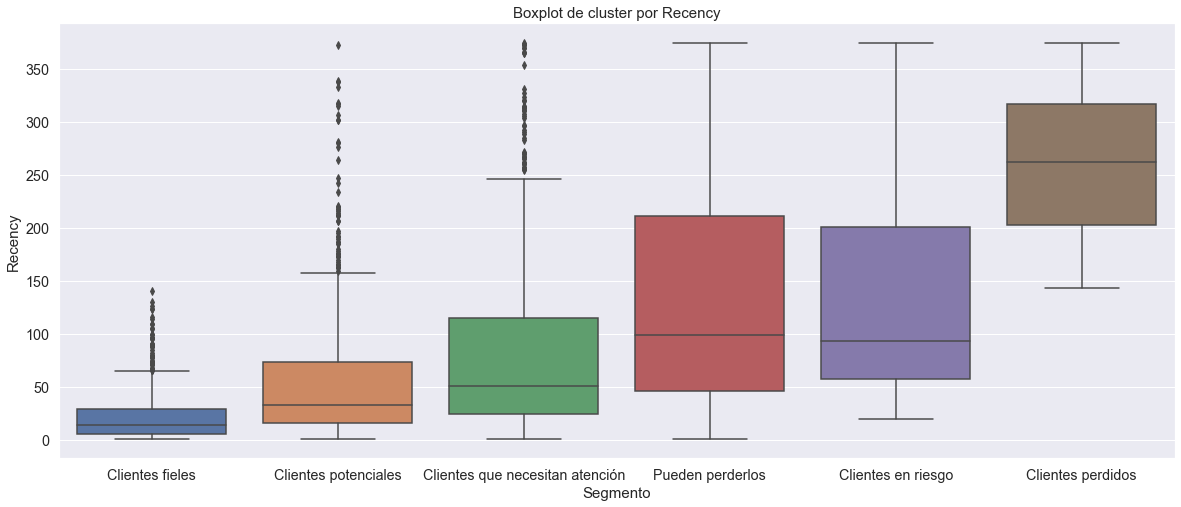

In [50]:
plt.figure(figsize=(20,8))

sns.boxplot(x='Class_Cluster', y='Recency', data=df_cluster)

plt.title('Boxplot de cluster por Recency', fontsize =15)

plt.xlabel('Segmento',fontsize =15)

plt.ylabel('Recency', fontsize =15)

plt.savefig(path.reports_figures_dir('BOX_Cluster.png'), format='png', dpi=1000)

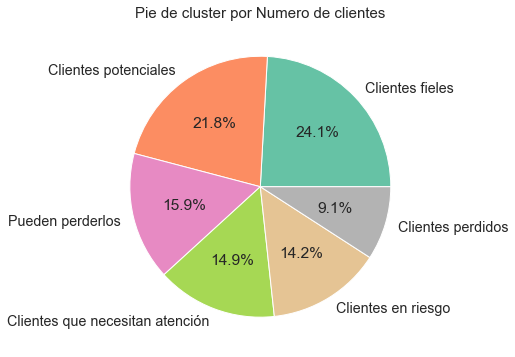

In [51]:
plt.figure(figsize=(20,8))

sq1=df_cluster.groupby('Class_Cluster')['CustomerID'].nunique().sort_values(ascending=False).plot(kind='pie',cmap='Set2',figsize=(6,6),autopct='%1.1f%%')

plt.title('Pie de cluster por Numero de clientes', fontsize =15)

plt.axis('off')
# plt.xticks([])
# plt.yticks([])

plt.savefig(path.reports_figures_dir('pie_Cluster.png'), format='png', dpi=1000)

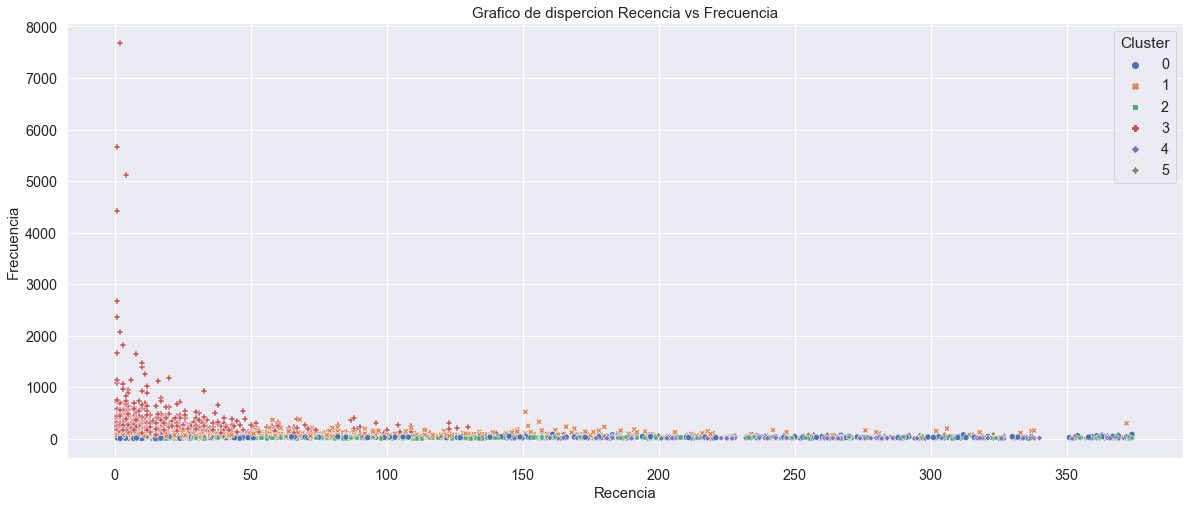

In [52]:
plt.figure(figsize=(20,8))

sns.scatterplot(data=df_cluster, y= 'Frequency', x='Recency', hue='Cluster' , style="Cluster")

plt.title('Grafico de dispercion Recencia vs Frecuencia', fontsize =15)

plt.xlabel('Recencia',fontsize =15)

plt.ylabel('Frecuencia', fontsize =15)

plt.savefig(path.reports_figures_dir('scatter_Cluster.png'), format='png', dpi=1000)


In [ ]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean'],
        'Variety': ['mean']
    }).round(0)
    return df_new

In [53]:
df_cluster.Class_Cluster.value_counts().reset_index()

,index,Class_Cluster
0,Clientes fieles,1047
1,Clientes potenciales,944
2,Pueden perderlos,689
3,Clientes que necesitan atención,648
4,Clientes en riesgo,614
5,Clientes perdidos,396


clus_3 = 'Loyal Customers'
clus_1 = 'Potential Costumers'
clus_5 = 'Customers Needing Attention'
clus_0 = 'Can lose them'
clus_2 = 'At risk customers'
clus_4 = 'Lost Customers'

Cluster 3 => Clientes fieles => Gastan buen dinero con nosotros a menudo y responden a las promociones.

Cluster 1 => Clientes Potenciales => Clientes recientes, pero que gastan una buena cantidad y compran más de una vez.

Cluster 5 => Clientes que necesitan atención => Por encima de la media en cuanto a recencia, frecuencia y valores monetarios. Sin embargo, es posible que no hayan comprado muy recientemente.

Cluster 0 => Puede perderlos => sobre la media de recencia, frecuencia y valores monetarios. No ha comprado recientemente.

Grupo 2 => Clientes en riesgo => Frecuencia, frecuencia y valores monetarios por debajo de la media, además han comprado hace mucho tiempo.

Cluster 4 => Cliente perdido => La última compra fue hace mucho tiempo, gastan poco y tienen pocos pedidos.

Recomendación
Basándonos en los 6 clusters, podríamos formular estrategias de marketing relevantes para cada cluster:

Clúster 3 => Clientes fieles => Hacer upselling de productos de mayor valor, pedir reseñas y comprometerse con ellos.

Clúster 1 => Cliente potencialmente leal => Ofrezca un programa de membresía / lealtad, y recomiende otros productos.

Cluster 5 y 0 => Clientes que necesitan atención y puede perderlos  => Hacer ofertas por tiempo limitado, recomendar en base a compras anteriores, compartir recursos valiosos, recomendar productos populares / renovaciones con descuento, y reconectar con ellos.

Cluster 2 y 4 => Cliente en riesgo y perdido => Reactivar el interés con una campaña de alcance, ignorar lo contrario, ofrecer otros productos relevantes y descuentos especiales, y recrear el valor de la marca.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ad5389b-d0fe-4f26-b030-dadc57d353b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>